In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer


In [2]:
df=pd.read_csv('holidays_events.csv')

In [14]:
df.shape

(350, 6)

In [15]:
df.columns

Index(['date', 'type', 'locale', 'locale_name', 'description', 'transferred'], dtype='object')

In [16]:
print("tFirst 5 rows of the dataset:")
print(df.head())

tFirst 5 rows of the dataset:
         date  type    locale locale_name                    description  \
0  2012-03-02     3     Local       Manta             Fundacion de Manta   
1  2012-04-01     3  Regional    Cotopaxi  Provincializacion de Cotopaxi   
2  2012-04-12     3     Local      Cuenca            Fundacion de Cuenca   
3  2012-04-14     3     Local    Libertad      Cantonizacion de Libertad   
4  2012-04-21     3     Local    Riobamba      Cantonizacion de Riobamba   

   transferred  
0        False  
1        False  
2        False  
3        False  
4        False  


In [17]:
print("Last 5 rows of the dataset:")
print(df.tail())

Last 5 rows of the dataset:
           date  type    locale locale_name description  transferred
345  2017-12-22     0  National     Ecuador   Navidad-3        False
346  2017-12-23     0  National     Ecuador   Navidad-2        False
347  2017-12-24     0  National     Ecuador   Navidad-1        False
348  2017-12-25     3  National     Ecuador     Navidad        False
349  2017-12-26     0  National     Ecuador   Navidad+1        False


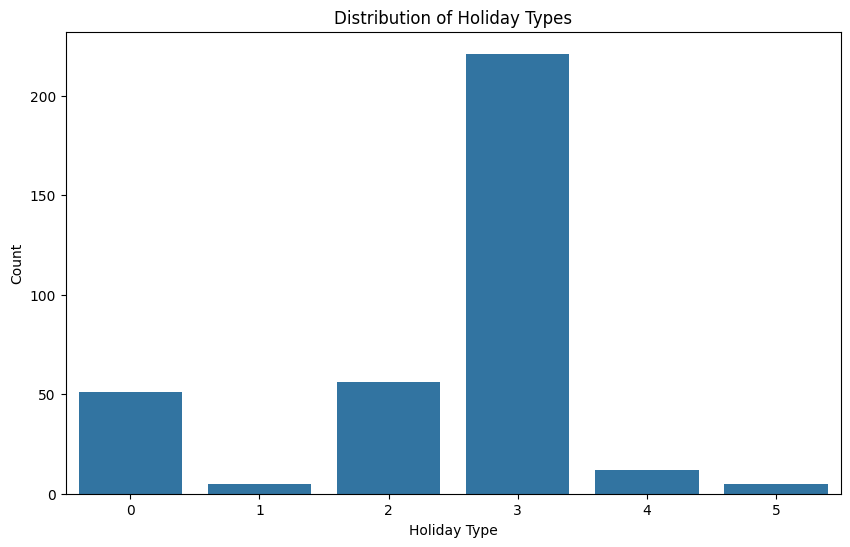

In [22]:
df.isnull().sum()
imputer = SimpleImputer(strategy='most_frequent')
df['description'] = imputer.fit_transform(df['description'].values.reshape(-1, 1))[:, 0]
encoder = LabelEncoder()
df['type'] = encoder.fit_transform(df['type'])
plt.figure(figsize=(10, 6))
sns.countplot(x='type', data=df)
plt.title('Distribution of Holiday Types')
plt.xlabel('Holiday Type')
plt.ylabel('Count')
plt.show()



In [4]:
df.isnull().sum()

,0
date,0
type,0
locale,0
locale_name,0
description,0
transferred,0


In [13]:
imputer = SimpleImputer(strategy='most_frequent')
df['description'] = imputer.fit_transform(df['description'].values.reshape(-1, 1))[:,0]


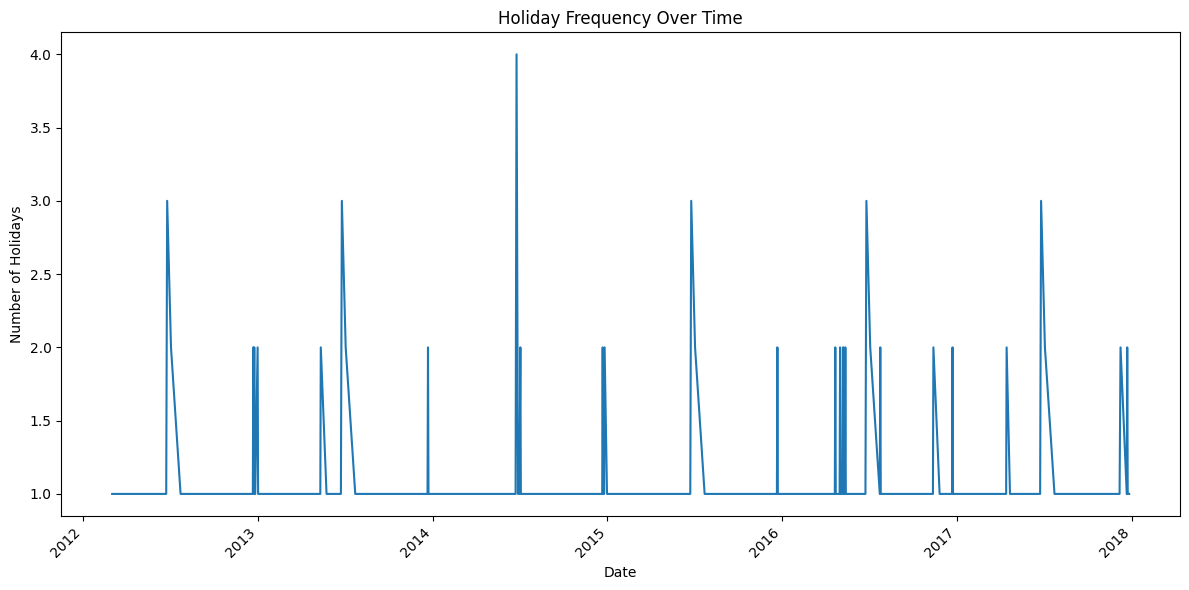

In [23]:
df['date'] = pd.to_datetime(df['date'])  # Convert 'date' column to datetime objects

# Group by date and count the number of holidays on each date
holiday_counts = df.groupby('date')['type'].count().reset_index()

# Create a line plot to visualize the holidays over time
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='type', data=holiday_counts)
plt.title('Holiday Frequency Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Holidays')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()
plt.show()

In [26]:
df['date'] = pd.to_datetime(df['date'])

# Group by date and count the number of holidays on each date
holiday_counts = df.groupby('date')['type'].count().reset_index()
holiday_counts = holiday_counts.rename(columns={'type': 'holiday_count'})

# Prepare data for linear regression
X = holiday_counts.index.values.reshape(-1, 1)  # Use index as numerical representation of date
y = holiday_counts['holiday_count'].values

# Create and fit the linear regression model
model = LinearRegression()  # Now LinearRegression is defined
model.fit(X, y)

# ... (rest of your code) ...

LinearRegression()

In [35]:
import statsmodels.formula.api as smf
import pandas as pd

holiday_counts['year'] = holiday_counts['date'].dt.year
holiday_counts['month'] = holiday_counts['date'].dt.month

model = smf.mixedlm("holiday_count ~ year + month", data=holiday_counts, groups=holiday_counts["year"], re_formula="~year")

result = model.fit()

print(result.summary())

                Mixed Linear Model Regression Results
Model:                 MixedLM    Dependent Variable:    holiday_count
No. Observations:      312        Method:                REML         
No. Groups:            6          Scale:                 0.1590       
Min. group size:       35         Log-Likelihood:        -189.1281    
Max. group size:       75         Converged:             Yes          
Mean group size:       52.0                                           
----------------------------------------------------------------------
                 Coef.    Std.Err.     z    P>|z|   [0.025     0.975] 
----------------------------------------------------------------------
Intercept         8.484    12289.293  0.001 0.999 -24078.089 24095.056
year             -0.004        6.100 -0.001 1.000    -11.960    11.953
month            -0.001        0.007 -0.106 0.915     -0.014     0.013
Group Var         0.159 43602134.325                                  
Group x year Cov -0.000

/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2200: ConvergenceWarning: Retrying MixedLM optimization with lbfgs
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:1634: UserWarning: Random effects covariance is singular
  warnings.warn(msg)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2237: ConvergenceWarning: The MLE may be on the boundary of the parameter space.
  warnings.warn(msg, ConvergenceWarning)
/usr/local/lib/python3.11/dist-packages/statsmodels/regression/mixed_linear_model.py:2261: ConvergenceWarning: The Hessian matrix at the estimated parameter values is not positive definite.
  warnings.warn(msg, ConvergenceWarning)


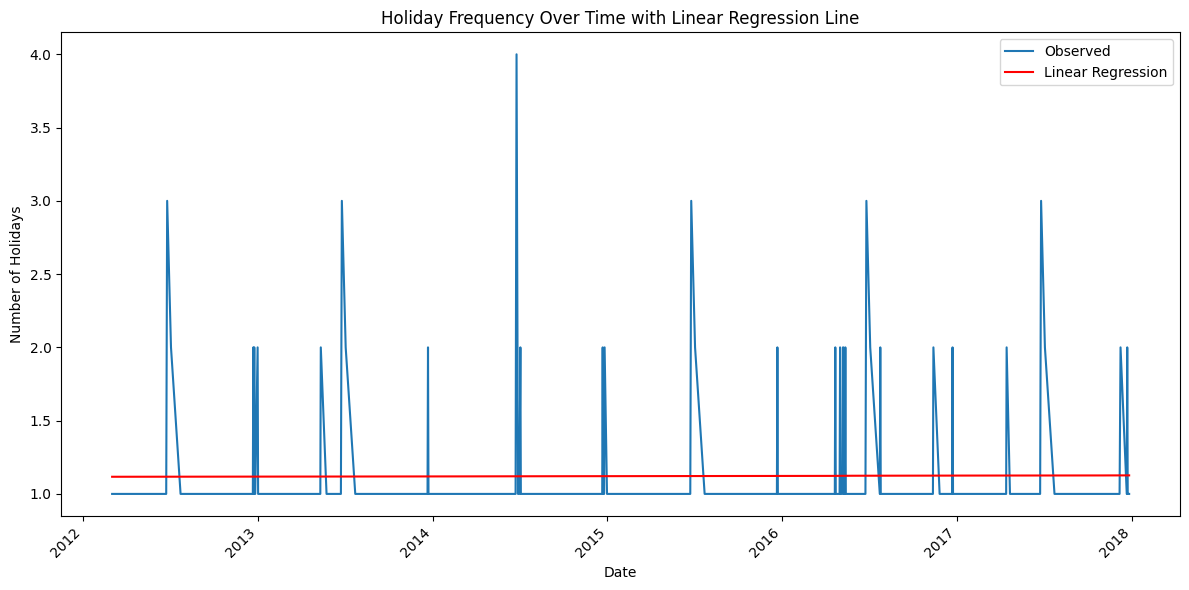

In [37]:
X = holiday_counts.index.values.reshape(-1, 1)  # Use index as numerical representation of date
y = holiday_counts['holiday_count'].values

# Create and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict holiday counts using the model
predicted_counts = model.predict(X)

# Create the line plot
plt.figure(figsize=(12, 6))
sns.lineplot(x='date', y='holiday_count', data=holiday_counts, label='Observed')  # Plot original data
plt.plot(holiday_counts['date'], predicted_counts, color='red', label='Linear Regression')  # Plot regression line
plt.title('Holiday Frequency Over Time with Linear Regression Line')
plt.xlabel('Date')
plt.ylabel('Number of Holidays')
plt.xticks(rotation=45, ha='right')
plt.legend()  # Add legend to distinguish lines
plt.tight_layout()
plt.show()

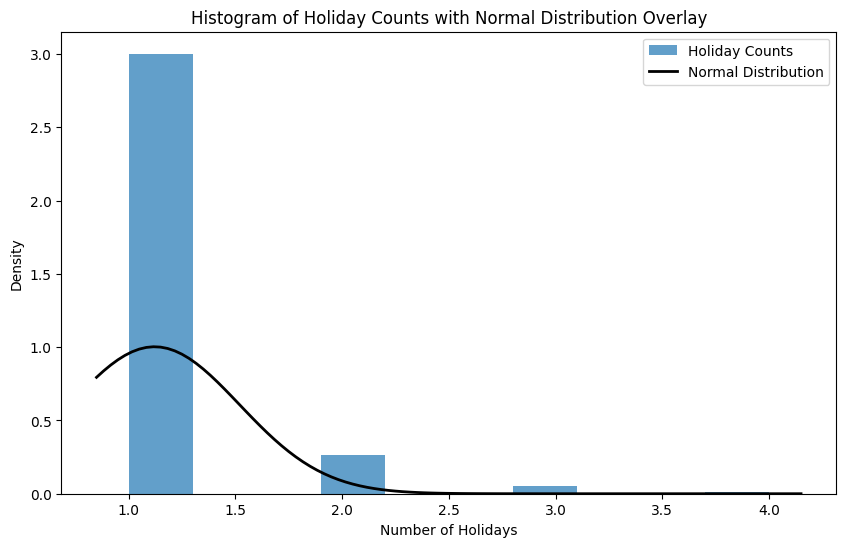

In [40]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Assuming you have 'holiday_counts' DataFrame with 'holiday_count' column

# Create the histogram
plt.figure(figsize=(10, 6))
plt.hist(holiday_counts['holiday_count'], bins=10, density=True, alpha=0.7, label='Holiday Counts')  # Histogram

# Fit a normal distribution to the data
mu, std = norm.fit(holiday_counts['holiday_count'])

# Create the normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)
plt.plot(x, p, 'k', linewidth=2, label='Normal Distribution')  # Normal curve

plt.title('Histogram of Holiday Counts with Normal Distribution Overlay')
plt.xlabel('Number of Holidays')
plt.ylabel('Density')
plt.legend()
plt.show()